In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, average_precision_score


In [284]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/miftahudinfaiz/RainfallPrediction/main/Rainfall.csv')


In [285]:
# Preprocessing steps (drop columns, handle missing values, etc.)

# Drop irrelecant data
data = data.drop(columns=['Stasiun','Tanggal'],

                 axis=1)
data = data.dropna(how='any')

# Split the data into features (X) and target variable (Y)
Y = data['Besok_hujan']
X = data.drop(columns=['Besok_hujan', 'Hari_hujan'])

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)


In [286]:
# PCA
pca = PCA().fit(X1)
X1_pca = pca.transform(X1)
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), index=list(range(1, len(pca.explained_variance_ratio_) + 1)))


In [287]:
# Define the base classifiers
base_classifier_bagging = KNeighborsClassifier(n_neighbors=5)
base_classifier_boosting = DecisionTreeClassifier(max_depth=1)

# Define the ensemble bagging classifier
ensemble_model_bagging = BaggingClassifier(base_estimator=base_classifier_bagging, n_estimators=10, random_state=9)

# Train ensemble bagging model
ensemble_model_bagging.fit(X_train, Y_train)

# Define the ensemble boosting estimator
ensemble_model_boosting = AdaBoostClassifier(base_estimator=base_classifier_boosting, n_estimators=10, random_state=9)

# Train ensemble boosting model
ensemble_model_boosting.fit(X_train, Y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=10, random_state=9)

In [ ]:
# KNN Classifier
knncla = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knncla.fit(X_train, Y_train)
Y_pred_knncla = knncla.predict(X_test)
accuracy_knncla = accuracy_score(Y_test, Y_pred_knncla)
confusion_matrix_knncla = confusion_matrix(Y_test, Y_pred_knncla)
classification_report_knncla = classification_report(Y_test, Y_pred_knncla)


In [ ]:
# LinearSVC and Feature Selection
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False, random_state=9).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
selected_features = list(X.columns[model.get_support(indices=True)])
X1 = data[selected_features]
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size=0.3, random_state=9)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [288]:
# Predict using knn model
Y_pred_knn = knncla.predict(X_test)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
confusion_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
classification_report_knn = classification_report(Y_test, Y_pred_knn)


In [289]:
# Evaluate knn model
print("knn Classification Report:")
print(classification_report_knn)
print("knn Accuracy:", accuracy_knn)
print("knn Confusion Matrix:")
print(confusion_matrix_knn)


knn Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       205
           1       0.80      0.99      0.88        72

    accuracy                           0.93       277
   macro avg       0.90      0.95      0.92       277
weighted avg       0.94      0.93      0.93       277

knn Accuracy: 0.9314079422382672
knn Confusion Matrix:
[[187  18]
 [  1  71]]


In [290]:
# Average precision-recall score
average_precision = average_precision_score(Y_test, Y_pred_knn)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.79


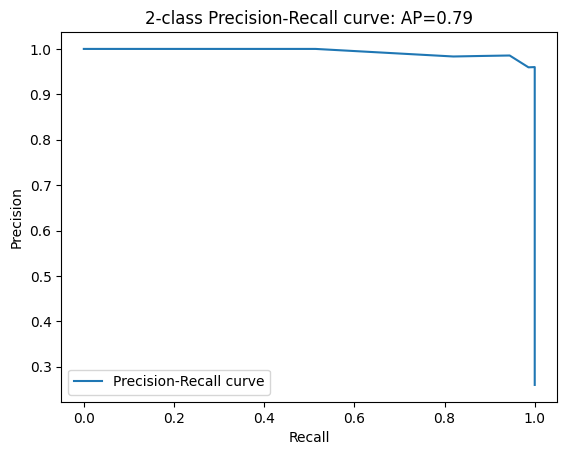

In [291]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, ensemble_model_boosting.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


In [292]:
# Predict using ensemble bagging model
Y_pred_ensemble_bagging = ensemble_model_bagging.predict(X_test)
accuracy_ensemble_bagging = accuracy_score(Y_test, Y_pred_ensemble_bagging)
confusion_matrix_ensemble_bagging = confusion_matrix(Y_test, Y_pred_ensemble_bagging)
classification_report_ensemble_bagging = classification_report(Y_test, Y_pred_ensemble_bagging)


In [293]:
# Evaluate ensemble bagging model
print("Ensemble Bagging Classification Report:")
print(classification_report_ensemble_bagging)
print("Ensemble Bagging Accuracy:", accuracy_ensemble_bagging)
print("Ensemble Bagging Confusion Matrix:")
print(confusion_matrix_ensemble_bagging)


Ensemble Bagging Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       205
           1       0.82      0.99      0.89        72

    accuracy                           0.94       277
   macro avg       0.91      0.95      0.93       277
weighted avg       0.95      0.94      0.94       277

Ensemble Bagging Accuracy: 0.9386281588447654
Ensemble Bagging Confusion Matrix:
[[189  16]
 [  1  71]]


In [294]:
# Average precision-recall score
average_precision = average_precision_score(Y_test, Y_pred_ensemble_bagging)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.81


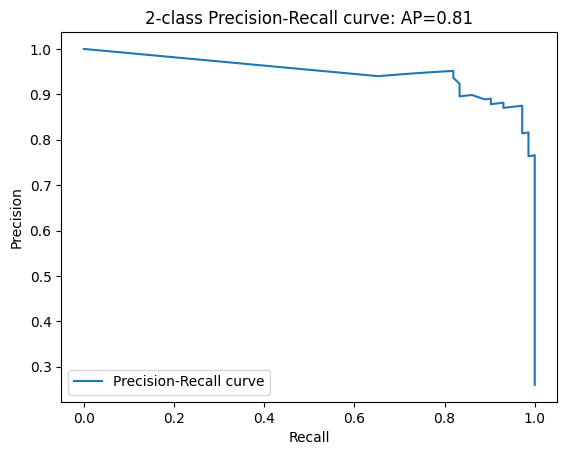

In [295]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, ensemble_model_bagging.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()


In [296]:
# Predict using ensemble boosting model
Y_pred_ensemble_boosting = ensemble_model_boosting.predict(X_test)
accuracy_ensemble_boosting = accuracy_score(Y_test, Y_pred_ensemble_boosting)
confusion_matrix_ensemble_boosting = confusion_matrix(Y_test, Y_pred_ensemble_boosting)
classification_report_ensemble_boosting = classification_report(Y_test, Y_pred_ensemble_boosting)


In [297]:
# Evaluate ensemble boosting model
print("Ensemble Boosting Classification Report:")
print(classification_report_ensemble_boosting)
print("Ensemble Boosting Accuracy:", accuracy_ensemble_boosting)
print("Ensemble Boosting Confusion Matrix:")
print(confusion_matrix_ensemble_boosting)

Ensemble Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       205
           1       0.96      1.00      0.98        72

    accuracy                           0.99       277
   macro avg       0.98      0.99      0.99       277
weighted avg       0.99      0.99      0.99       277

Ensemble Boosting Accuracy: 0.9891696750902527
Ensemble Boosting Confusion Matrix:
[[202   3]
 [  0  72]]


In [298]:
# Average precision-recall score
average_precision = average_precision_score(Y_test, Y_pred_ensemble_boosting)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


Average precision-recall score: 0.96


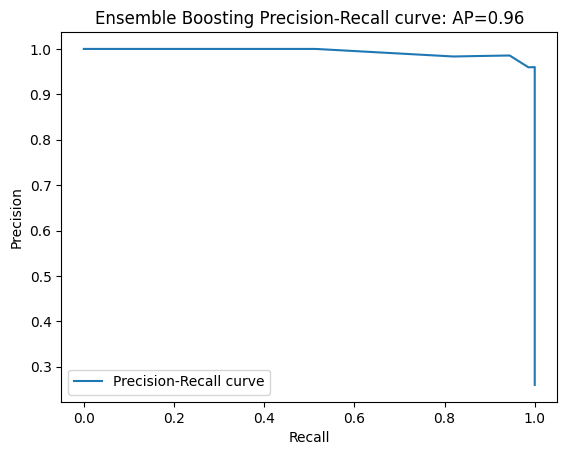

In [299]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, ensemble_model_boosting.decision_function(X_test))

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Ensemble Boosting Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")
plt.show()

In [300]:
# Individual models evaluation
model_scores = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score'])


In [301]:
# KNN alone
train_score_knncla = knncla.score(X_train, Y_train) * 100
test_score_knncla = knncla.score(X_test, Y_test) * 100
model_scores = model_scores.append({'Model': 'KNN', 'Train Score': train_score_knncla, 'Test Score': test_score_knncla},
                                   ignore_index=True)


<ipython-input-301-5515a528d42f>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'KNN', 'Train Score': train_score_knncla, 'Test Score': test_score_knncla},


In [302]:
# Ensemble Bagging (KNN)
train_score_ensemble_bagging = ensemble_model_bagging.score(X_train, Y_train) * 100
test_score_ensemble_bagging = ensemble_model_bagging.score(X_test, Y_test) * 100
model_scores = model_scores.append({'Model': 'Ensemble Bagging', 'Train Score': train_score_ensemble_bagging,
                                    'Test Score': test_score_ensemble_bagging}, ignore_index=True)

<ipython-input-302-746dc649b21e>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'Ensemble Bagging', 'Train Score': train_score_ensemble_bagging,


In [303]:
# Ensemble Boosting(Decision Tree)
train_score_ensemble_boosting = ensemble_model_boosting.score(X_train, Y_train) * 100
test_score_ensemble_boosting = ensemble_model_boosting.score(X_test, Y_test) * 100
model_scores = model_scores.append({'Model': 'Ensemble Boosting', 'Train Score': train_score_ensemble_boosting,
                                    'Test Score': test_score_ensemble_boosting}, ignore_index=True)

print("\nModel Scores:")
print(model_scores)


Model Scores:
               Model  Train Score  Test Score
0                KNN    97.058824   93.140794
1   Ensemble Bagging    97.213622   93.862816
2  Ensemble Boosting    97.987616   98.916968


<ipython-input-303-13f791a2b370>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_scores = model_scores.append({'Model': 'Ensemble Boosting', 'Train Score': train_score_ensemble_boosting,
